In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sys
import os
os.getcwd()
sys.path.insert(0, '..')
from correlation_eval import theils_u

In [23]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [52]:
train_data.isna().sum(axis=0)

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2
Cabin_cat              0
Survived_encoded       0
Pclass_encoded         0
Sex_encoded            0
Cabin_cat_encoded      0
Embarked_encoded       0
dtype: int64

In [53]:
test_data.isna().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Cabin_cat        0
dtype: int64

In [3]:
train_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

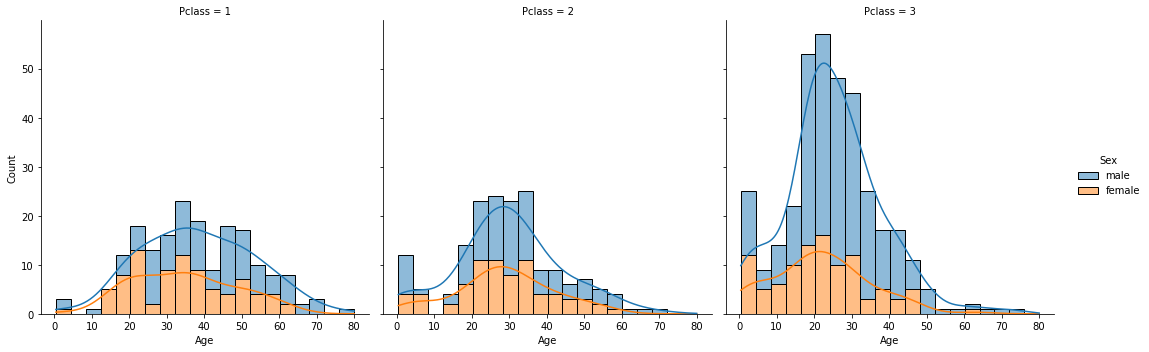

In [4]:
g=sns.displot(data=train_data, x='Age', col='Pclass', hue='Sex', multiple='stack', kde=True, kde_kws={'cut':0})

In [46]:
train_data['Cabin_cat']=train_data['Cabin'].apply(lambda x: 'None' if x is np.nan else x[0])
test_data['Cabin_cat']=test_data['Cabin'].apply(lambda x: 'None' if x is np.nan else x[0])

In [37]:
category_cols = ['Survived', 'Pclass', 'Sex', 'Cabin_cat', 'Embarked']
numerical_cols = ['Survived', 'Age', 'Fare', 'SibSp', 'Parch']

In [38]:
category_encoded_cols = [name + '_encoded' for name in category_cols]
train_data[category_encoded_cols]=train_data[category_cols].apply(lambda x: pd.factorize(x)[0])

In [63]:
corr = train_data[category_encoded_cols].corr(method=theils_u)
corr

Survived_encoded  Pclass_encoded  Sex_encoded  \
Survived_encoded           1.000000        0.087260     0.226562   
Pclass_encoded             0.087260        1.000000     0.009525   
Sex_encoded                0.226562        0.009525     1.000000   
Cabin_cat_encoded          0.082776        0.363801     0.034199   
Embarked_encoded           0.025031        0.074002     0.014929   

                   Cabin_cat_encoded  Embarked_encoded  
Survived_encoded            0.082776          0.025031  
Pclass_encoded              0.363801          0.074002  
Sex_encoded                 0.034199          0.014929  
Cabin_cat_encoded           1.000000          0.051315  
Embarked_encoded            0.051315          1.000000

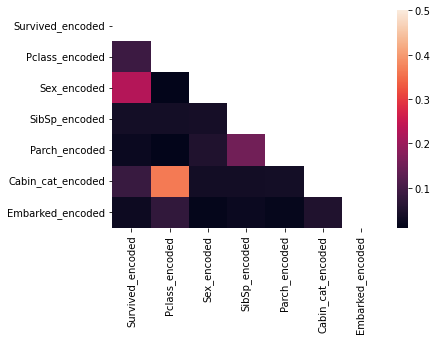

In [22]:
corr = train_data[category_encoded_cols].corr(method=theils_u)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
g = sns.heatmap(corr, mask=mask, vmax=0.5)

In [30]:
corr = train_data[numerical_cols].corr()
corr

Survived       Age      Fare     SibSp     Parch
Survived  1.000000 -0.077221  0.257307 -0.035322  0.081629
Age      -0.077221  1.000000  0.096067 -0.308247 -0.189119
Fare      0.257307  0.096067  1.000000  0.159651  0.216225
SibSp    -0.035322 -0.308247  0.159651  1.000000  0.414838
Parch     0.081629 -0.189119  0.216225  0.414838  1.000000

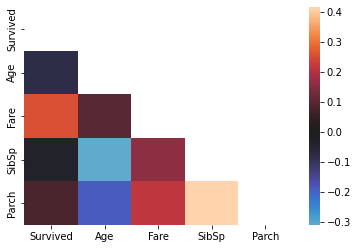

In [48]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
g = sns.heatmap(corr, mask=mask, center=0)

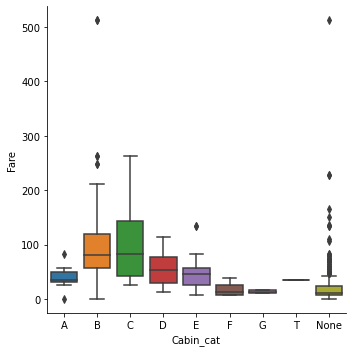

In [45]:
g = sns.catplot(data=train_data, x='Cabin_cat', y='Fare', kind='box',
                order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'None'])

In [51]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

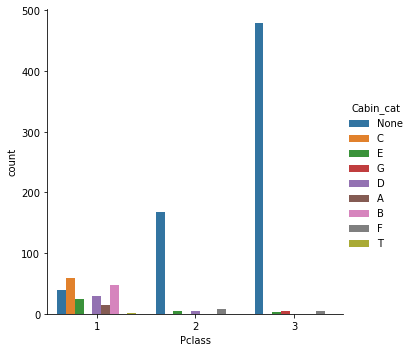

In [54]:
g = sns.catplot(data=train_data, x='Pclass', hue='Cabin_cat', kind='count')

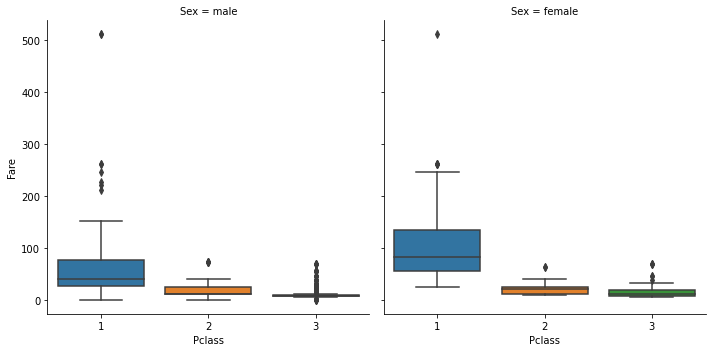

In [61]:
g = sns.catplot(data=train_data, x='Pclass', y='Fare', kind='box', col='Sex')